In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
from molsysmt import puw
import numpy as np
import matplotlib.pyplot as plt

# Get contacts

A contact map is a logic matrix where the element (i-th,j-th) is True if the distance between i-th and j-th is lower, or equal, than a certain threshold. The contact map is a common tool, simple but effective, used to represent structural motifs from the protein-protein interaface of the protein folding, for example. MolSysMT includes a method, based on `molsysmt.distance()`, to obtain contact maps: `molsysmt.contact_map()`. As such, `molsysmt.contact_map` inherits many input arguments from `molsysmt.distance()`. Lets see a couple of examples in this section.

Lets get the contact map obtained with the threshold 1.2 nm and the CA atoms from the dimer found in the system with pdb id 1TCD:

In [3]:
molecular_system = msm.convert('1TCD', 'molsysmt.MolSys')

/home/diego/projects/MolSysMT/molsysmt/form/mmtf_MMTFDecoder/to_molsysmt_Topology.py:34: UserWarning: The structure in the PDB has biological assemblies. There are geometrical transformations proposed in the structure. See the following issue in the source code repository: https://github.com/uibcdf/MolSysMT/issues/33
  warnings.warn(warning_message)


In [4]:
CA_atoms = msm.select(molecular_system, selection='atom_name=="CA"')

In [5]:
contact_map = msm.structure.get_contacts(molecular_system, selection=CA_atoms, threshold='1.2 nm')

In [6]:
contact_map

array([[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]]])

Our molecular system has a single frame. That's why the shape of the output is the following:

In [7]:
contact_map.shape

(1, 497, 497)

Where 497 is the total number of CA atoms in our system:

In [8]:
print(msm.get(molecular_system, element='atom', selection="atom_name=='CA'", n_atoms=True))

497


Usually the contact map is represented as a plot. The structural motifs can be then easily identify:

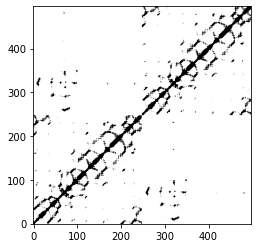

In [9]:
plt.imshow(contact_map[0], cmap='Greys', origin='lower')
plt.show()

The contact map can also be computed among elements from different sets. Lets get the contact map with the same threshold but this time between the CA atoms from both chains:

In [10]:
CA_atoms_chain_0 = msm.get(molecular_system, element='atom', selection="atom_name=='CA' and chain_index==0", atom_index=True)
CA_atoms_chain_1 = msm.get(molecular_system, element='atom', selection="atom_name=='CA' and chain_index==1", atom_index=True)

In [11]:
contact_map = msm.structure.get_contacts(molecular_system, selection=CA_atoms_chain_0, selection_2=CA_atoms_chain_1,
                              threshold=1.2*puw.unit('nm'))

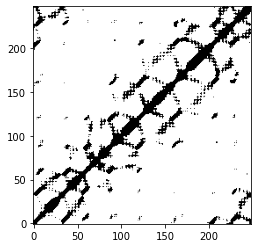

In [12]:
plt.imshow(contact_map[0], cmap='Greys', origin='lower')
plt.show()

The molecular system is homodimeric, thereby the interface is symmetric as it can be seen in this last plot.

Finnally, `molsysmt.contact_map()` can also work with atoms groups. Instead of getting the contact map between CA atoms, lets do it now with the geometric centers of the residues:

In [13]:
atoms_in_residues_chain_0 = msm.get(molecular_system, element='group',
                                    selection="molecule_type=='protein' and chain_index==0", atom_index=True)
atoms_in_residues_chain_1 = msm.get(molecular_system, element='group',
                                    selection="molecule_type=='protein' and chain_index==1", atom_index=True)

In [14]:
contact_map = msm.structure.get_contacts(molecular_system,
                              groups_of_atoms=atoms_in_residues_chain_0, group_behavior='geometric_center',
                              groups_of_atoms_2=atoms_in_residues_chain_1, group_behavior_2='geometric_center',
                              threshold=1.2*puw.unit('nm'))

In [15]:
contact_map.shape

(1, 248, 249)

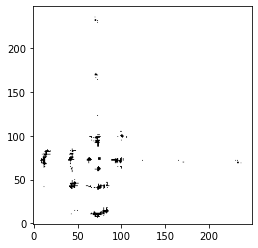

In [16]:
plt.imshow(contact_map[0], cmap='Greys', origin='lower')
plt.show()

In [17]:
contact_map[0,48,40:50]

array([False, False, False, False,  True, False, False,  True, False,
       False])